In [1]:
import sys
sys.path.insert(0, '..')

# Obtención de reportes

In [2]:
import controllers as c

In [3]:
reports = c.get_reports()
len(reports), reports[:5]

(30,
  <models.Report at 0x7fb1e234d550>])

In [4]:
columns = [c for c in list(reports[0].__dict__.keys()) if c != '_id']
columns

['report_id',
 'creation_time',
 'status',
 'component',
 'dupe_of',
 'summary',
 'comments']

In [5]:
import pandas as pd

In [6]:
df_reports = pd.DataFrame(columns=columns, data=[r.__dict__ for r in reports])
df_masters = df_reports[df_reports['dupe_of'].isnull()]
df_duplicate = df_reports[df_reports['dupe_of'].notnull()]
df_reports.head()

,report_id,creation_time,status,component,dupe_of,summary,comments
0,1613869,2020-02-07 10:12:04,RESOLVED,Address Bar,NaN,Enable urlbar.update1.* prefs on early Beta,Initial try run: https://treeherder.mozilla.or...
1,1610472,2020-01-21 11:47:24,NEW,Address Bar,NaN,[meta] Make urlbar modules better reusable in ...,We are considering re-using urlbar modules in ...
2,1608461,2020-01-10 15:35:54,RESOLVED,Address Bar,NaN,Determine what kind of telemetry in-product Se...,"Ben or Teon, we're in the process of porting S..."
3,1607196,2020-01-06 13:41:57,RESOLVED,Toolbars and Customization,1598598.0,Intermittent browser/components/customizableui...,**Filed by:** aciure [at] mozilla.com\n**Parse...
4,1606911,2020-01-03 20:11:29,RESOLVED,Address Bar,1608461.0,Ensure telemetry for Tips is sufficient and ad...,Because Event Telemetry can only be enabled fo...


# Graficar las variables disponibles

## Distribución de duplicados y maestros

15 duplicates, 15 masters


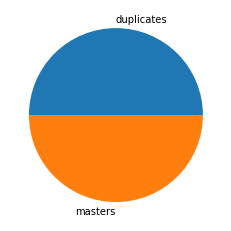

In [7]:
# Plot duplicates number and masters number
import matplotlib.pyplot as plt
plt.pie([len(df_duplicate), len(df_masters)], labels=['duplicates', 'masters'])
print(f"{len(df_duplicate)} duplicates, {len(df_masters)} masters")
plt.show()

## Frecuencias de 'status' y 'component'

/tmp/ipykernel_387905/1431934425.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(x1_axis, rotation=90)
/tmp/ipykernel_387905/1431934425.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(x2_axis, rotation=90)


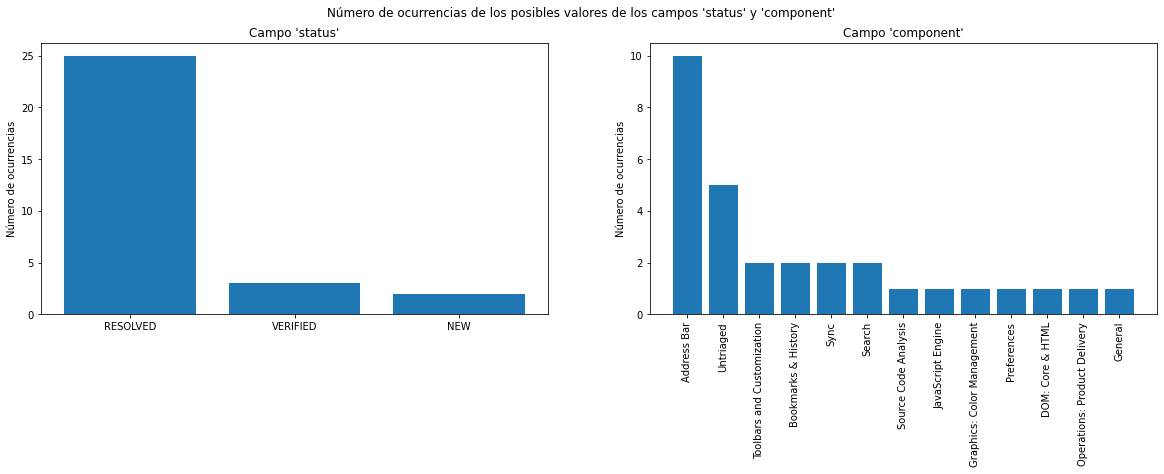

In [73]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
fig.suptitle("Número de ocurrencias de los posibles valores de los campos 'status' y 'component'")

x1_axis = df_reports['status'].value_counts().index
y1_axis = df_reports['status'].value_counts().values
ax1.bar(x1_axis, y1_axis)
ax1.set_title("Campo 'status'")
ax2.set_xticklabels(x1_axis, rotation=90)
ax1.set_ylabel('Número de ocurrencias')

x2_axis = df_reports['component'].value_counts().index
y2_axis = df_reports['component'].value_counts().values
ax2.bar(x2_axis, y2_axis)
ax2.set_title("Campo 'component'")
ax2.set_xticklabels(x2_axis, rotation=90)
ax2.set_ylabel('Número de ocurrencias')

plt.show()

## Longitudes de los campos de texto

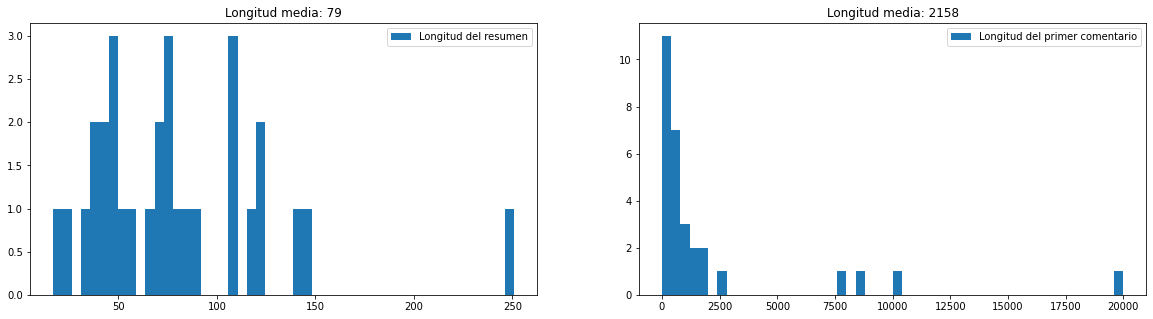

In [33]:
df_reports['len_summary'] =  [len(s) for s in df_reports['summary']]
df_reports['len_comments'] = [len(s) for s in df_reports['comments']]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

ax1.hist(df_reports['len_summary'], bins=50, label='Longitud del resumen')
ax1.legend()
ax1.set_title(f"Longitud media: {int(df_reports['len_summary'].mean())}")

ax2.hist(df_reports['len_comments'], bins=50, label='Longitud del primer comentario')
ax2.legend()
ax2.set_title(f"Longitud media: {int(df_reports['len_comments'].mean())}")

plt.show()

### Valores anómalos

#### Por arriba

In [13]:
high_summary_anomalies = df_reports[df_reports['len_summary'] > 100]
high_comments_anomalies = df_reports[df_reports['len_comments'] > 2500]
print(f"Número de anomalías en resumen: {len(high_summary_anomalies)}")
print(f"Número de anomalías en comentarios: {len(high_comments_anomalies)}")

Número de anomalías en resumen: 9
Número de anomalías en comentarios: 5


In [14]:
for summary in high_summary_anomalies['summary']:
    print(summary)
    print('-'*50)

Intermittent browser/components/customizableui/test/browser_976792_insertNodeInWindow.js (finished) | application terminated with exit code 2
--------------------------------------------------
Perma Beta TEST-UNEXPECTED-FAIL |browser_urlbar_top_sites.js | The number of results should be the same as the number of Top Sites (6). - 1 == 6 - JS frame :: <...>browser_urlbar_top_sites.js :: topSitesShown when Gecko 73 merges to Beta on 2020-01-06
--------------------------------------------------
Perma beta browser/components/urlbar/tests/browser/browser_urlbar_event_telemetry.js | Test timed out - when Gecko 73 merges to Beta on 2020-01-06
--------------------------------------------------
[meta] Investigate moving some functions from browser.js into the new address bar code once QuantumBar rewrite is complete
--------------------------------------------------
implicitly-declared 'IPC::Principal::Principal(const IPC::Principal&)' is deprecated [-Werror=deprecated-copy]
---------------------

In [15]:
# for comment in comments_anomalies['comments']:
#     print(comment)
#     print('-'*50)

In [16]:
print([len(comment) for comment in high_comments_anomalies['comments']])

[7880, 10110, 8523, 19992, 2796]


#### Por abajo

In [17]:
low_summary_anomalies = df_reports[df_reports['len_summary'] < 50]
low_comments_anomalies = df_reports[df_reports['len_comments'] < 50]
print(f"Número de anomalías en resumen: {len(low_summary_anomalies)}")
print(f"Número de anomalías en comentarios: {len(low_comments_anomalies)}")

Número de anomalías en resumen: 10
Número de anomalías en comentarios: 1


In [18]:
for summary in low_summary_anomalies['summary']:
    print(summary)
    print('-'*50)

Enable urlbar.update1.* prefs on early Beta
--------------------------------------------------
Enable Tips in Nightly
--------------------------------------------------
Image clipboard not retaining ICC profile
--------------------------------------------------
Store history engine metadata in places.sqlite
--------------------------------------------------
Warnings with -Werror=deprecated-copy
--------------------------------------------------
stringop-truncation warning in SandboxBroker.cpp
--------------------------------------------------
directory listing
--------------------------------------------------
[EV SSL] Organization Name is truncated
--------------------------------------------------
Qwant search engine doesn't work
--------------------------------------------------
Contradictory statement in 'about:config' page
--------------------------------------------------


In [19]:
for comment in low_comments_anomalies['comments']:
    print(comment)
    print('-'*50)


--------------------------------------------------


### Cadenas vacías

In [20]:
# Get percentage of empty strings in summary and comments
df_reports['empty_summary'] = [s == '' for s in df_reports['summary']]
df_reports['empty_comments'] = [s == '' for s in df_reports['comments']]

In [21]:
df_reports['empty_summary'].value_counts()

False    30
Name: empty_summary, dtype: int64

In [22]:
df_reports['empty_comments'].value_counts()

False    29
True      1
Name: empty_comments, dtype: int64

# Exploración de datos

In [23]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /home/ajburri/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [24]:
df_reports['summary_tokens'] = [word_tokenize(s) for s in df_reports['summary']]
df_reports['comments_tokens'] = [word_tokenize(s) for s in df_reports['comments']]

In [25]:
unique_summary_tokens = set([w for s in df_reports['summary_tokens'] for w in s])
unique_comments_tokens = set([w for s in df_reports['comments_tokens'] for w in s])

In [26]:
print(f"Número de tokens únicaos en resumen: {len(unique_summary_tokens)}")
print(f"Número de tokens únicaos en comentarios: {len(unique_comments_tokens)}")

Número de tokens únicaos en resumen: 247
Número de tokens únicaos en comentarios: 1591


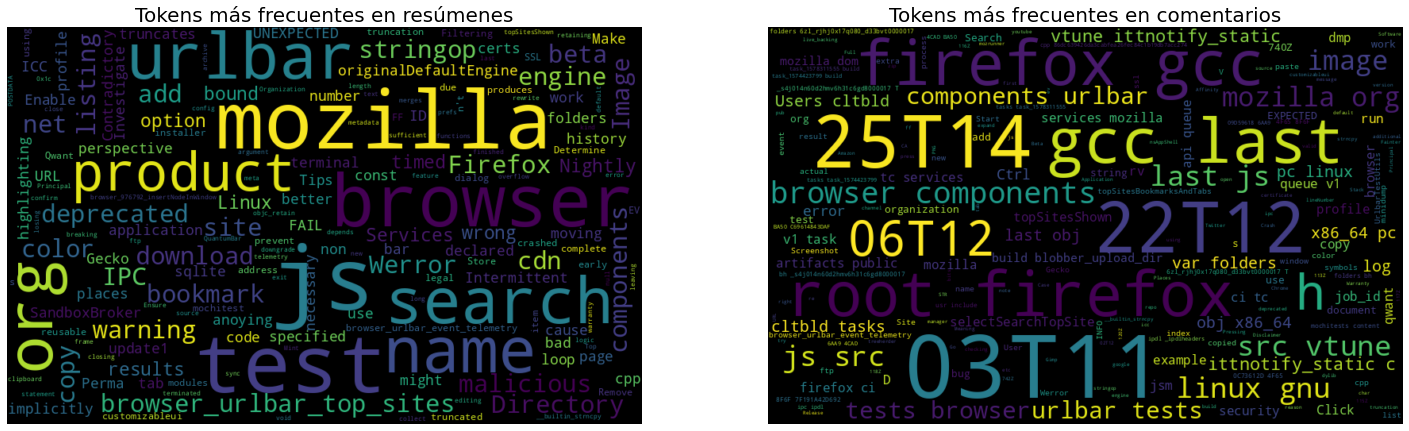

In [27]:
from wordcloud import WordCloud
summary_wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(' '.join(unique_summary_tokens))
comments_wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(' '.join(unique_comments_tokens))

# Plot in same axis, different graphs
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 15))
ax1.imshow(summary_wordcloud, interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Tokens más frecuentes en resúmenes', fontsize=20)
ax2.imshow(comments_wordcloud, interpolation='bilinear')
ax2.axis("off")
ax2.set_title('Tokens más frecuentes en comentarios', fontsize=20)
plt.show()

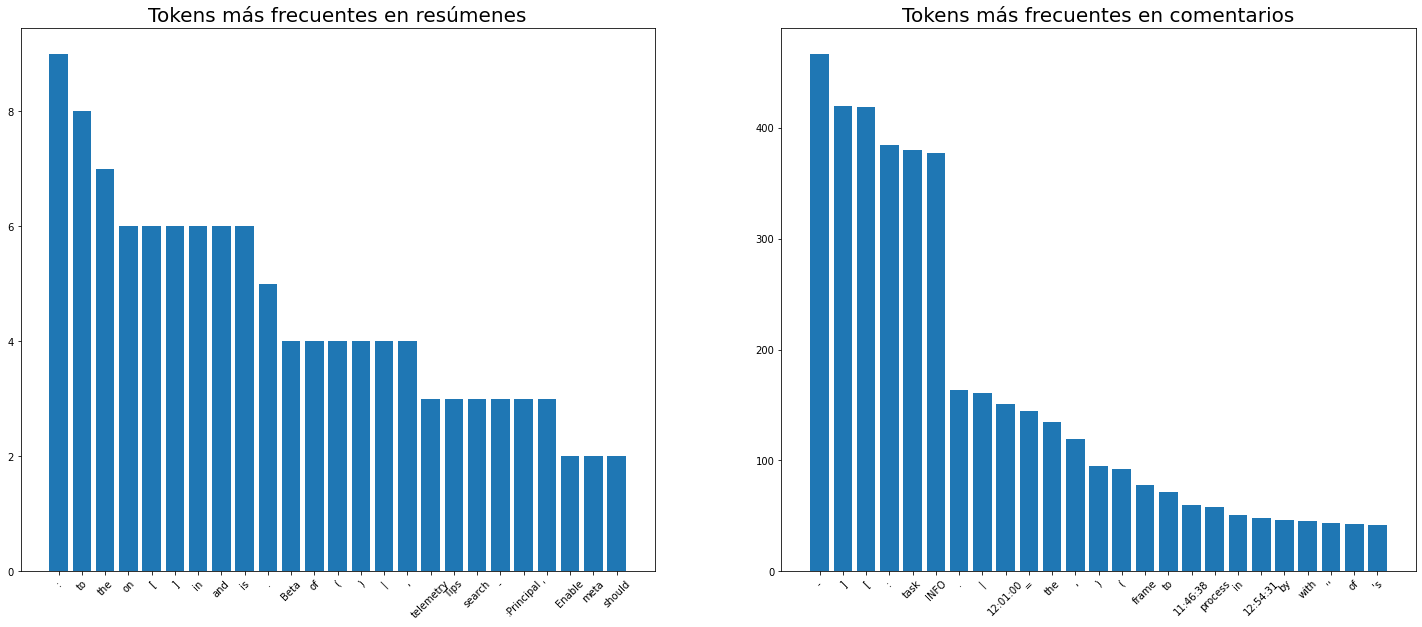

In [80]:
from collections import Counter

summary_counter = Counter(w for s in df_reports['summary_tokens'] for w in s)
comments_counter = Counter(w for s in df_reports['comments_tokens'] for w in s)

summary_counter_25 = summary_counter.most_common(25)
comments_counter_25 = comments_counter.most_common(25)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 10))

ax1.bar(range(len(summary_counter_25)), [count for word, count in summary_counter_25], align='center')
ax1.set_xticks(range(len(summary_counter_25)))
ax1.set_xticklabels([word for word, count in summary_counter_25], rotation=45)
ax1.set_title('Tokens más frecuentes en resúmenes', fontsize=20)

ax2.bar(range(len(comments_counter_25)), [count for word, count in comments_counter_25], align='center')
ax2.set_xticks(range(len(comments_counter_25)))
ax2.set_xticklabels([word for word, count in comments_counter_25], rotation=45)
ax2.set_title('Tokens más frecuentes en comentarios', fontsize=20)

plt.show()

# Pequeño preprocesamiento

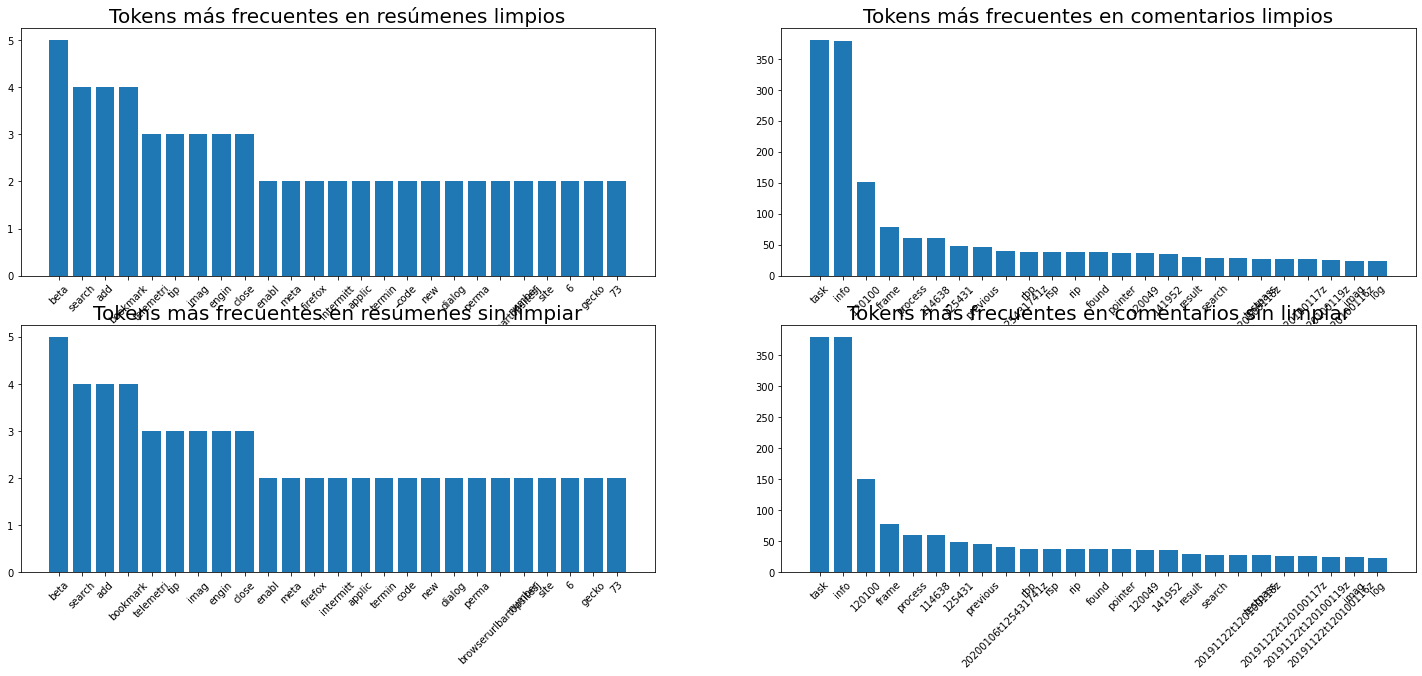

In [90]:
## Eliminar puntuación, caracteres especiales, números y stopwords. En inglés
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem import SnowballStemmer

stemmer = SnowballStemmer('english')

def clean_text(text):
    text = text.lower()
    text = ''.join([c for c in text if c not in punctuation])
    tokens = word_tokenize(text)
    tokens = [w for w in tokens if w not in stopwords.words('english')]
    tokens = [stemmer.stem(w) for w in tokens]
    return tokens

df_reports['summary_clean_tokens'] = [clean_text(s) for s in df_reports['summary']]
df_reports['comments_clean_tokens'] = [clean_text(s) for s in df_reports['comments']]

clean_summary_counter = Counter(w for s in df_reports['summary_clean_tokens'] for w in s)
clean_comments_counter = Counter(w for s in df_reports['comments_clean_tokens'] for w in s)

clean_summary_counter_25 = clean_summary_counter.most_common(25)
clean_comments_counter_25 = clean_comments_counter.most_common(25)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(25, 10))

ax1.bar(range(len(clean_summary_counter_25)), [count for word, count in clean_summary_counter_25], align='center')
ax1.set_xticks(range(len(clean_summary_counter_25)))
ax1.set_xticklabels([word for word, count in clean_summary_counter_25], rotation=45)
ax1.set_title('Tokens más frecuentes en resúmenes limpios', fontsize=20)

ax2.bar(range(len(clean_comments_counter_25)), [count for word, count in clean_comments_counter_25], align='center')
ax2.set_xticks(range(len(clean_comments_counter_25)))
ax2.set_xticklabels([word for word, count in clean_comments_counter_25], rotation=45)
ax2.set_title('Tokens más frecuentes en comentarios limpios', fontsize=20)

ax3.bar(range(len(summary_counter_25)), [count for word, count in summary_counter_25], align='center')
ax3.set_xticks(range(len(summary_counter_25)))
ax3.set_xticklabels([word for word, count in summary_counter_25], rotation=45)
ax3.set_title('Tokens más frecuentes en resúmenes sin limpiar', fontsize=20)

ax4.bar(range(len(comments_counter_25)), [count for word, count in comments_counter_25], align='center')
ax4.set_xticks(range(len(comments_counter_25)))
ax4.set_xticklabels([word for word, count in comments_counter_25], rotation=45)
ax4.set_title('Tokens más frecuentes en comentarios sin limpiar', fontsize=20)

plt.show()